In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [5]:
#Preprocess Data
# Drop the target column and isolate features
target = 'booking_complete'
features = df.drop(columns=[target])
labels = df[target]

In [6]:
# Encode categorical features
cat_cols = features.select_dtypes(include='object').columns
features_encoded = features.copy()

for col in cat_cols:
    features_encoded[col] = LabelEncoder().fit_transform(features_encoded[col].astype(str))


In [7]:
#Add engineered features here like 'intent_score'
features_encoded['intent_score'] = (
    df['wants_extra_baggage'] + df['wants_preferred_seat'] + df['wants_in_flight_meals']
)

In [8]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [9]:
#Train/Test Split + Model Training

In [10]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    features_encoded, labels, test_size=0.2, random_state=42, stratify=labels
)

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      8504
           1       0.54      0.10      0.17      1496

    accuracy                           0.85     10000
   macro avg       0.70      0.54      0.54     10000
weighted avg       0.81      0.85      0.81     10000

ROC AUC Score: 0.7718583830949638


In [11]:
#Cross-Validation

In [12]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, features_encoded, labels, cv=cv, scoring='roc_auc')

print("Cross-Validation ROC AUC Scores:", scores)
print("Average CV Score:", np.mean(scores))


Cross-Validation ROC AUC Scores: [0.75986842 0.76171121 0.76954243 0.76318619 0.76278779]
Average CV Score: 0.7634192080677189


In [13]:
#Visualization

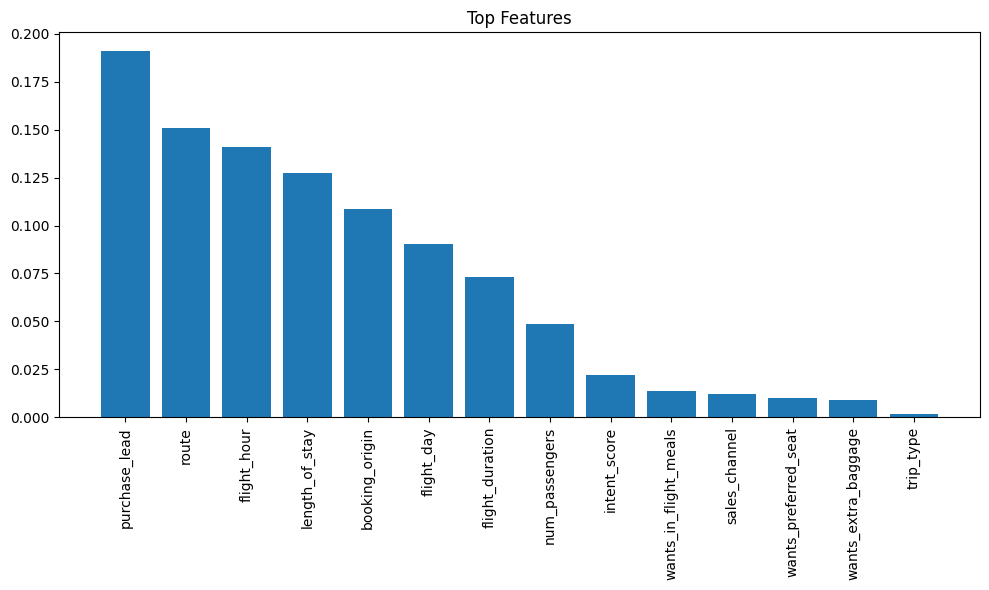

In [16]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = features_encoded.columns

# Sort and plot
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Top Features")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


In [17]:
#Evaluate Model Performance

In [18]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
)

# Predict on test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Accuracy: 0.8525
Precision: 0.5376344086021505
Recall: 0.10026737967914438
F1 Score: 0.16901408450704225
ROC AUC Score: 0.7718583830949638


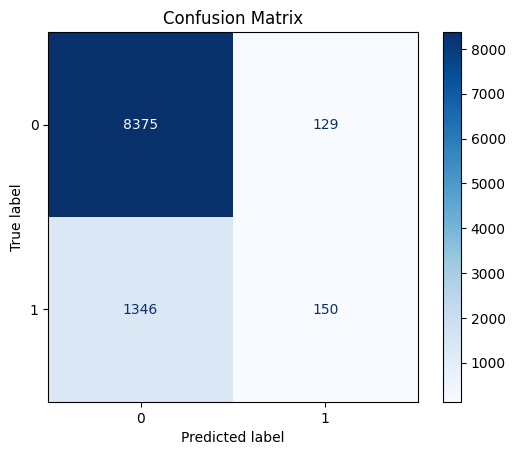

In [22]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [24]:
print(df.columns)


Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')


In [25]:
# Define features and target
X = df.drop(columns='booking_complete')
y = df['booking_complete']
# Check for class imbalance
print("Class distribution:")
print(y.value_counts())

print("\nPercentage distribution:")
print(y.value_counts(normalize=True) * 100)


Class distribution:
booking_complete
0    42522
1     7478
Name: count, dtype: int64

Percentage distribution:
booking_complete
0    85.044
1    14.956
Name: proportion, dtype: float64


In [26]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [27]:
# Define features and target
X = df.drop(columns='booking_complete')
y = df['booking_complete']
# Check for class imbalance
print("Class distribution:")
print(y.value_counts())

print("\nPercentage distribution:")
print(y.value_counts(normalize=True) * 100)


Class distribution:
booking_complete
0    42522
1     7478
Name: count, dtype: int64

Percentage distribution:
booking_complete
0    85.044
1    14.956
Name: proportion, dtype: float64


In [28]:
from sklearn.ensemble import RandomForestClassifier

# Use class_weight='balanced' to counter the imbalance
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [30]:
#Re-Evaluate Model Performance

In [31]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
)

# Predict on test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Accuracy: 0.8531
Precision: 0.5521235521235521
Recall: 0.09558823529411764
F1 Score: 0.16296296296296298
ROC AUC Score: 0.7772780566301608


In [34]:
!pip install imbalanced-learn



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
#using SMOTE to improve the re-call 

In [36]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train model on resampled data
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluate again
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Accuracy: 0.8112
Precision: 0.36593707250341995
Recall: 0.35762032085561496
F1 Score: 0.36173089925625423
ROC AUC Score: 0.7612664031019061


In [38]:
#Re-Confusion Matrix

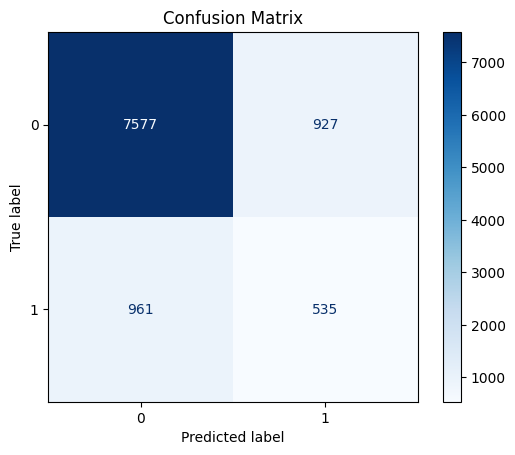

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()